In [29]:
import json
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [30]:
IMG_1 = "../data/jackal_irl_one_spin/images/3.png"
IMG_2 = "../data/jackal_irl_one_spin/images/4.png"

MASK_1 = "../data/jackal_irl_one_spin/masks/3.png.png"
MASK_2 = "../data/jackal_irl_one_spin/masks/4.png.png"

# Open Images and mask
img1 = cv2.imread(os.path.join(IMG_1))
img2 = cv2.imread(os.path.join(IMG_2))
mask1 = cv2.imread(os.path.join(MASK_1), cv2.IMREAD_GRAYSCALE)
mask2 = cv2.imread(os.path.join(MASK_2), cv2.IMREAD_GRAYSCALE)

# Convert to RGB
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

#Find SIFT featues in mask region
sift = cv2.SIFT_create()

kp1, des1 = sift.detectAndCompute(img1, mask1)
kp2, des2 = sift.detectAndCompute(img2, mask2)

In [31]:
print(len(kp1))
print(len(kp2))

# Match features
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)
print(bf)
print(len(matches))

# Apply ratio test
good = []
for m, n in matches:
    print(m.distance, n.distance)
    if m.distance < 0.75 * n.distance:
        good.append(m)
print(len(good))

54
52
< cv2.BFMatcher 0x7f7277ae1990>
54
336.3465576171875 350.57666015625
300.0616455078125 334.8372802734375
375.4836730957031 411.74505615234375
361.6946105957031 367.1879577636719
138.78761291503906 268.1473388671875
266.0958557128906 279.53173828125
208.00961303710938 372.5452880859375
185.7525177001953 250.92230224609375
212.68756103515625 245.26719665527344
237.5057830810547 294.2991638183594
155.83966064453125 480.4487609863281
388.293701171875 440.3805236816406
326.5486145019531 349.3565368652344
215.5922088623047 328.2499084472656
288.30712890625 343.9186096191406
18.734994888305664 398.89471435546875
343.18798828125 438.12213134765625
248.81117248535156 264.9471740722656
376.4784240722656 436.2934875488281
453.3409423828125 462.535400390625
108.91739654541016 381.2125244140625
388.89459228515625 413.7982482910156
447.322021484375 461.24395751953125
347.7110900878906 358.00140380859375
161.5766143798828 323.4161376953125
360.55511474609375 436.09747314453125
97.55511474609375

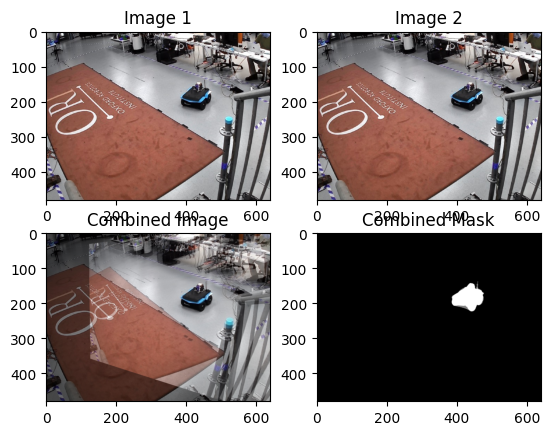

In [32]:
src_pts = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1, 2)
dst_pts = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1, 2)

# Find Homography
H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

# Warp images
img1_warped = cv2.warpPerspective(img1, H, (img2.shape[1], img2.shape[0]))
mask1_warped = cv2.warpPerspective(mask1, H, (mask2.shape[1], mask2.shape[0]))

# Combine images
img_combined = cv2.addWeighted(img1_warped, 0.5, img2, 0.5, 0)
mask_combined = cv2.addWeighted(mask1_warped, 0.5, mask2, 0.5, 0)

# Plot
plt.figure()
plt.subplot(221)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title("Image 1")
plt.subplot(222)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title("Image 2")
plt.subplot(223)
plt.imshow(cv2.cvtColor(img_combined, cv2.COLOR_BGR2RGB))
plt.title("Combined Image")
plt.subplot(224)
plt.imshow(mask_combined, cmap="gray")
plt.title("Combined Mask")
plt.show()

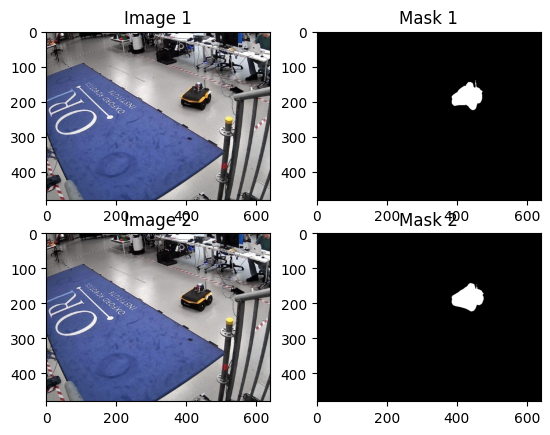

In [33]:
# Plot images and mask
fig, axs = plt.subplots(2, 2)
axs[0, 0].imshow(img1)
axs[0, 0].set_title("Image 1")
axs[0, 1].imshow(mask1, cmap='gray')
axs[0, 1].set_title("Mask 1")
axs[1, 0].imshow(img2)
axs[1, 0].set_title("Image 2")
axs[1, 1].imshow(mask2, cmap='gray')
axs[1, 1].set_title("Mask 2")
plt.show()